In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [57]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [44]:
print(f'train images: {train_X.shape}')
print(f'train label : {train_y.shape}')
print(f'train images: {test_X.shape}')
print(f'train label : {test_y.shape}')

train images: (60000, 28, 28)
train label : (60000,)
train images: (10000, 28, 28)
train label : (10000,)


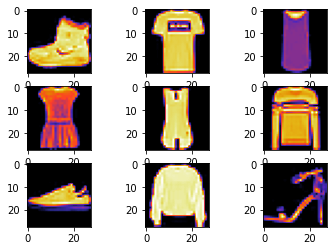

In [45]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i], cmap='CMRmap')
plt.show()

# Prepare Dataset

In [46]:
from tensorflow.keras.utils import to_categorical
# merubah dataset ke single channel
train_X = train_X.reshape((train_X.shape[0], 28,28,1))
test_X = test_X.reshape((test_X.shape[0], 28,28,1))
# mengubah target menjadi one hot encode
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

print(f'train images: {train_X.shape}')
print(f'train label : {train_y.shape}')
print(f'train images: {test_X.shape}')
print(f'train label : {test_y.shape}')

train images: (60000, 28, 28, 1)
train label : (60000, 10)
train images: (10000, 28, 28, 1)
train label : (10000, 10)


In [47]:
train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')

train_norm = train_norm/255
test_norm = test_norm/255

# Arsitektur Model

In [48]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

model = Sequential([
  layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
  layers.Dense(10, activation='softmax')
])

optimizer = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               540900    
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# Train Model

In [49]:
history = model.fit(train_norm, 
                    train_y,
                    epochs=10,
                    batch_size=32,
                    validation_data=(test_norm, test_y),
                    verbose=1)
scores = model.evaluate(test_norm,test_y, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4351 - accuracy: 0.8433 - val_loss: 0.3838 - val_accuracy: 0.8627
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2871 - accuracy: 0.8961 - val_loss: 0.3040 - val_accuracy: 0.8893
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2482 - accuracy: 0.9094 - val_loss: 0.2820 - val_accuracy: 0.8943
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2200 - accuracy: 0.9186 - val_loss: 0.2897 - val_accuracy: 0.8960
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1992 - accuracy: 0.9259 - val_loss: 0.2609 - val_accuracy: 0.9055
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1808 - accuracy: 0.9333 - val_loss: 0.2713 - val_accuracy: 0.9066
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1643 - accuracy: 0.9394 - val_loss: 0.2610 - val_accuracy:

# Plot Hasil Training

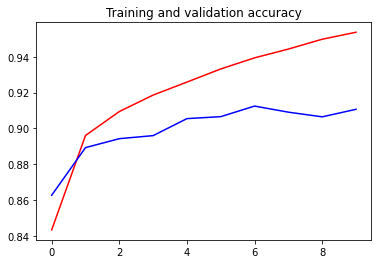

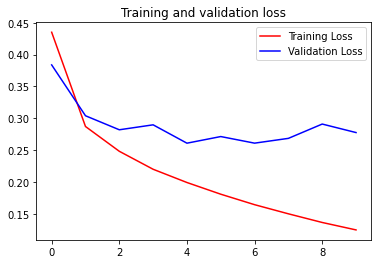

In [50]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r-', label='Training Loss')
  plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_loss_acc(history)

# Mencoba prekdisi dengan model

In [54]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
uploaded=files.upload()

for fn in uploaded.keys():
  # predicting images
  path='/content/' + fn
  print(path)
  img=image.load_img(path,grayscale=True, target_size=(28, 28))
  
  x=image.img_to_array(img)
  x = x.reshape(1, 28, 28, 1)
  x = x.astype('float32')
  x /= 255
  
  predict_value = model.predict(x)
  digit = np.argmax(predict_value)
  print(digit)
  print(class_names[digit])

In [53]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_X)
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.2319693 ],
      dtype=float32)

In [55]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

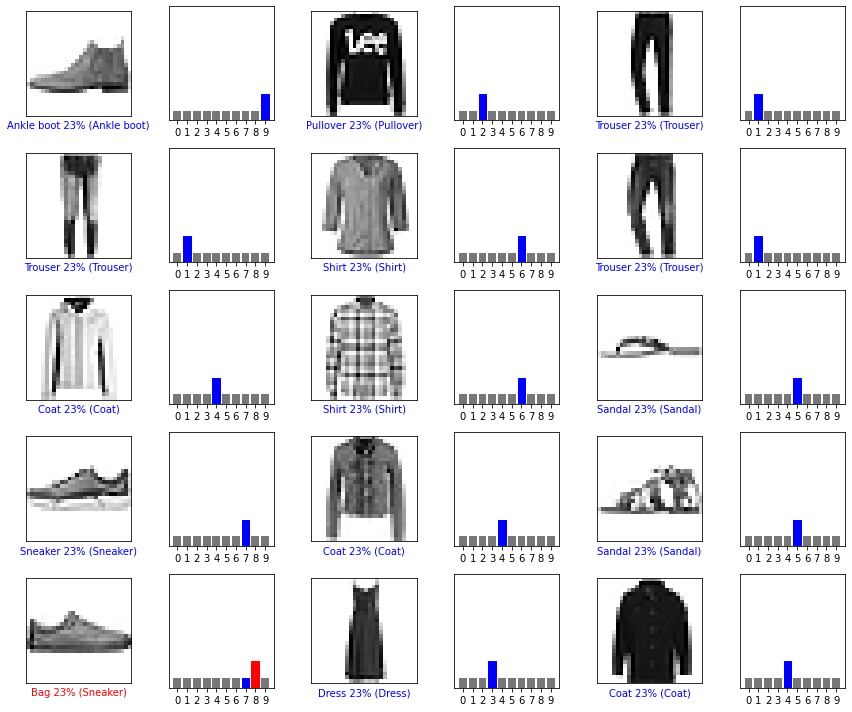

In [58]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_y, test_X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_y)
plt.tight_layout()
plt.show()

# Save Model

In [52]:
model.save('final_model.h5')